In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# reading the data

df = pd.read_csv("./Churn_Modelling.csv")

In [3]:
# creating a function to check the shape, head, tail,etc of the dataset

def check_df(dataframe, head=5):
    print("SHAPE".center(70, '-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print("DATA TYPES".center(70, '-'))
    print(dataframe.dtypes)
    print("HEAD".center(70, '-'))
    print(dataframe.head(head))
    print("TAIL".center(70, '-'))
    print(dataframe.tail(head))
    print("NULL VALUES".center(70, '-'))
    print(dataframe.isnull().sum())
    print("DUPLICATED VALUES".center(70, '-'))
    print(dataframe.duplicated().sum())
    print("DESCRIBE".center(70, '-'))
    print(dataframe.describe().T)

check_df(df)

--------------------------------SHAPE---------------------------------
Rows: 10000
Columns: 14
------------------------------DATA TYPES------------------------------
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object
---------------------------------HEAD---------------------------------
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4

In [4]:
# describing the dataframe using transpose

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [5]:
# value_counts of feature 'geography'

(df['Geography'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [6]:
# value_counts of feature 'gender'

df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

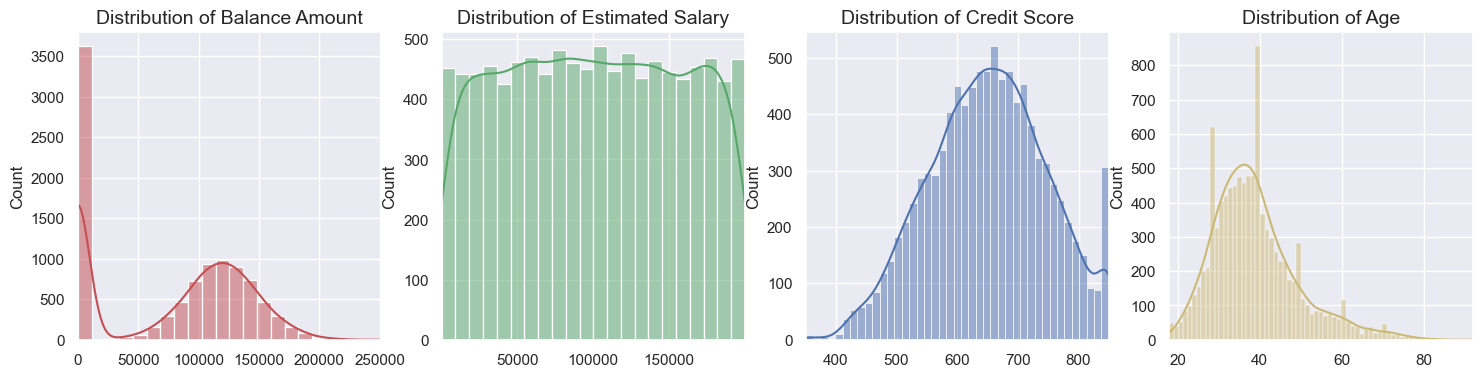

In [7]:
# plots for distribution of features using sns.histplot()

fig, ax = plt.subplots(1, 4, figsize=(18,4))

balance_val = df['Balance'].values
salary_val = df['EstimatedSalary'].values
credit_val = df['CreditScore'].values
age_val = df['Age'].values

sns.histplot(balance_val, ax=ax[0], color='r', kde=True)
ax[0].set_title('Distribution of Balance Amount', fontsize=14)
ax[0].set_xlim([min(balance_val), max(balance_val)])

sns.histplot(salary_val, ax=ax[1], color='g', kde=True)
ax[1].set_title('Distribution of Estimated Salary', fontsize=14)
ax[1].set_xlim([min(salary_val), max(salary_val)])

sns.histplot(credit_val, ax=ax[2], color='b', kde=True)
ax[2].set_title('Distribution of Credit Score', fontsize=14)
ax[2].set_xlim([min(credit_val), max(credit_val)])

sns.histplot(age_val, ax=ax[3], color='y', kde=True)
ax[3].set_title('Distribution of Age', fontsize=14)
ax[3].set_xlim([min(age_val), max(age_val)])

plt.show()

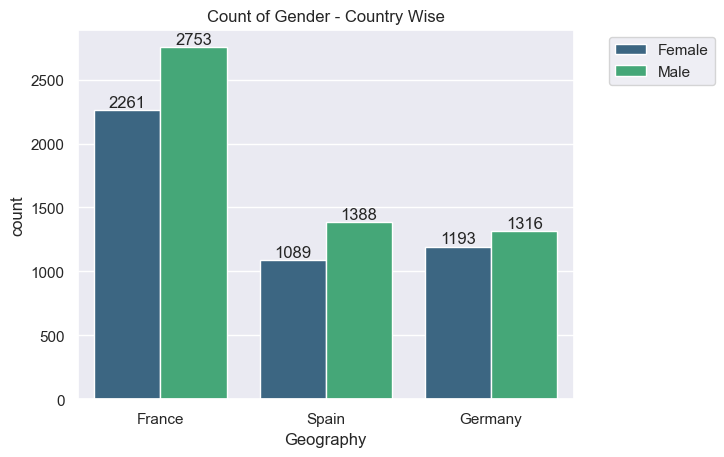

In [8]:
# count of 'gender' - country wise

ax = sns.countplot(x=df['Geography'], hue = df['Gender'], palette = 'viridis')
for label in ax.containers:
    ax.bar_label(label)

plt.title("Count of Gender - Country Wise")
plt.legend(bbox_to_anchor = (1.3,1))
plt.show()

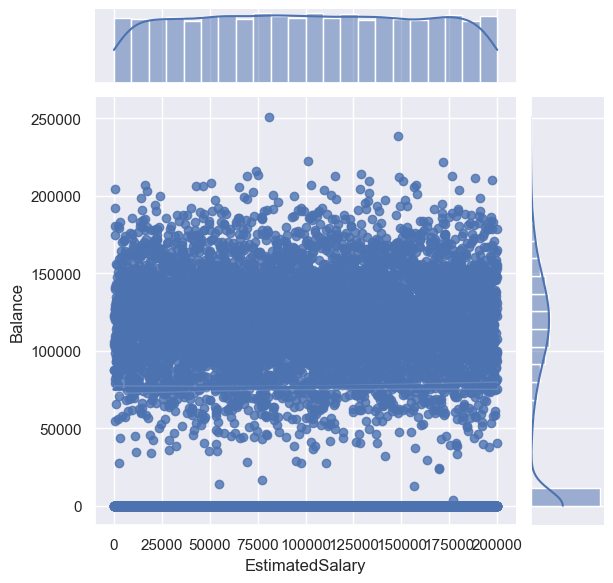

In [9]:
# jointplot for 'estimatedsalary' vs 'balance'
# JointPlot is used in knowing the relation and comparing the distribution between two variables.

sns.jointplot(x=df["EstimatedSalary"], y=df["Balance"],  kind='reg', palette='viridis')
plt.show()

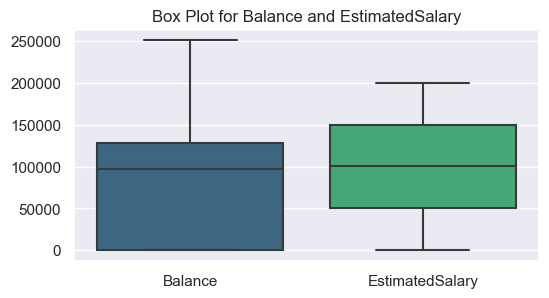

In [10]:
# BoxPlot for 'balance' and 'estimatedsalary'

plt.figure(figsize=(6,3))
sns.boxplot(data = df[['Balance', 'EstimatedSalary']], palette='viridis')

plt.title("Box Plot for Balance and EstimatedSalary")
plt.show()

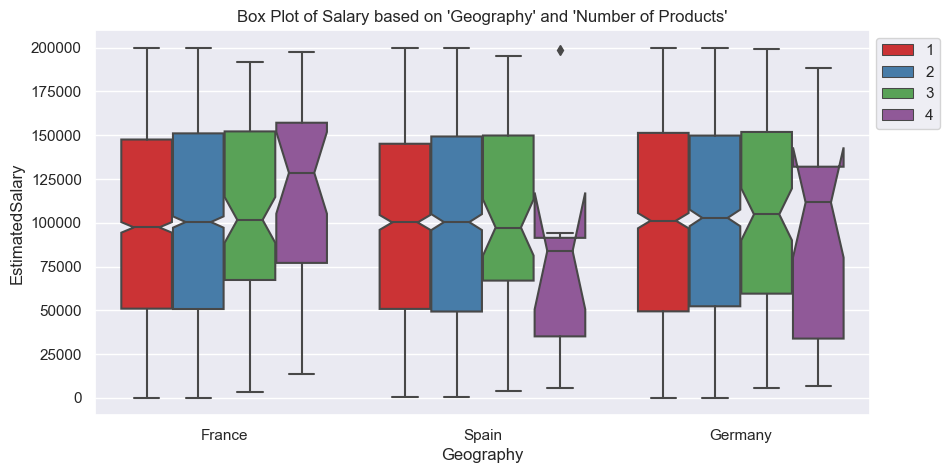

In [11]:
# a 'notch' in a boxplot means that narrowing the box around the median,
# it represents that 95% confidence interval for the median.

plt.figure(figsize=(10,5))
sns.boxplot(x = df['Geography'], y = df['EstimatedSalary'], hue = df['NumOfProducts'], palette="Set1", notch = True)
plt.legend(bbox_to_anchor=(1.1, 1))

plt.title("Box Plot of Salary based on 'Geography' and 'Number of Products'")
plt.show()

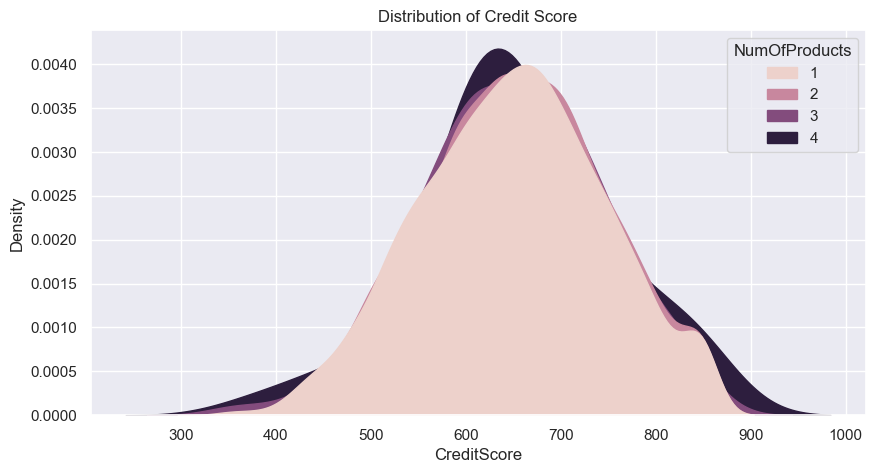

In [12]:
# Distribution of Credit Score

plt.figure(figsize=(10,5))
sns.kdeplot(x=df['CreditScore'], hue=df["NumOfProducts"], fill=True, common_norm=False, alpha=1)

plt.title("Distribution of Credit Score")
plt.show()

In [13]:
# mapping categorical values to numeric of 'geography' and 'gender' for further analysis

df['Geography'] = df['Geography'].map({'Spain':0, 'Germany':1, 'France':2})
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})

In [14]:
# dropping unwanted columns

df.drop(['CustomerId', 'Surname', 'RowNumber'], axis=1, inplace = True)

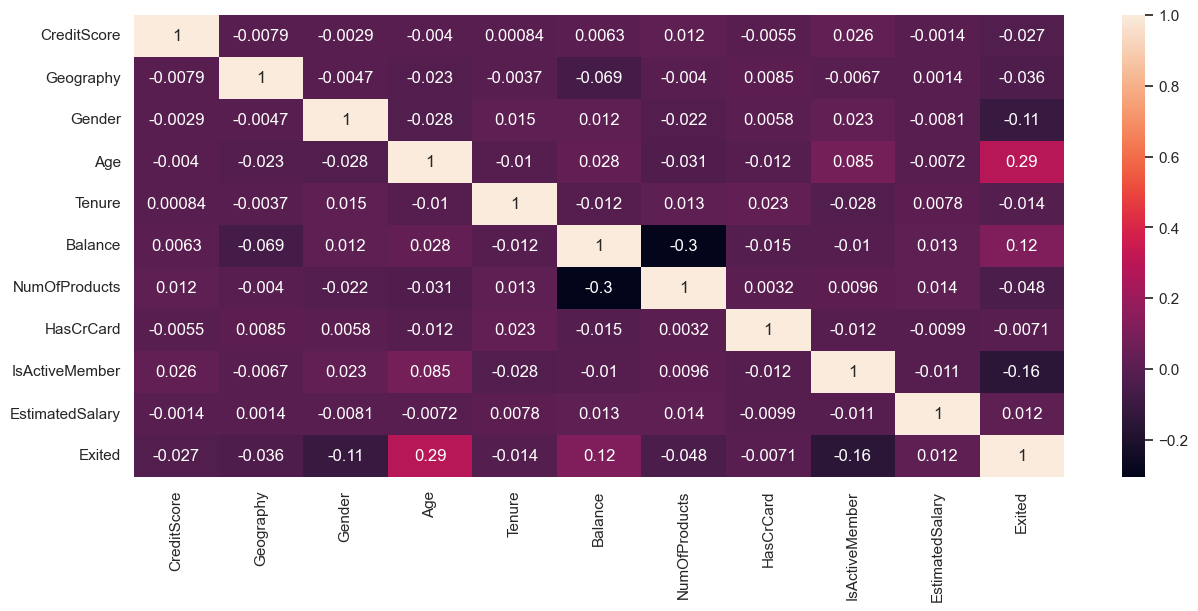

In [15]:
# heatmap for dataframe using correlation

plt.figure(figsize = (15,6))

sns.heatmap(df.corr(), annot=True)
plt.show()

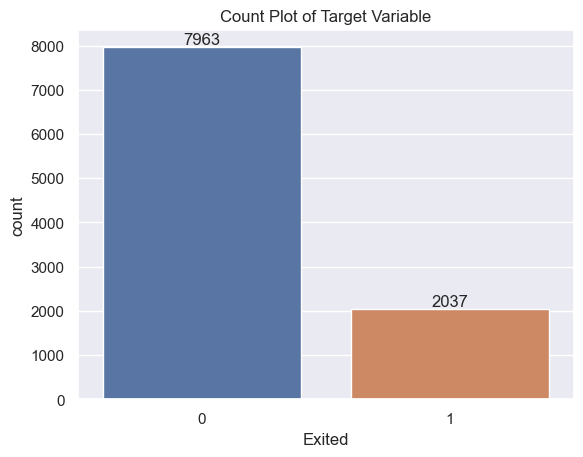

In [16]:
ax = sns.countplot(x = df['Exited'])
for label in ax.containers:
    ax.bar_label(label)
    
plt.title("Count Plot of Target Variable")
plt.show()

In [17]:
# Creating 'X' and 'y'

X = df.drop('Exited', axis=1)
y = df['Exited']

In [18]:
# Splitting data into train data and test data using 'train_test_split'

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
# Standardizing the data i.e., the data will have a mean of 0 and standard deviation of 1.

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

##### Random Forest

In [20]:
# Create an instance of RandomForestClassifier
# using 'class_weights' to balance the target feature, which is imbalanced
# fitting the model on train data
# predicting the model of test data
# evaluation metrics

forest_model = RandomForestClassifier(class_weight={0: 0.01, 1: 1.0})
forest_model.fit(x_train, y_train)
y_pred_forest = forest_model.predict(x_test)

print('Confusion Matrix:', '\n', confusion_matrix(y_pred_forest, y_test))
print('Classification Report:', '\n', classification_report(y_pred_forest, y_test))
print("Roc_Auc_Score: ", '\n', roc_auc_score(y_pred_forest, y_test))
print('F1 Score:', '\n', f1_score(y_pred_forest, y_test))

Confusion Matrix: 
 [[1564  233]
 [  43  160]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92      1797
           1       0.41      0.79      0.54       203

    accuracy                           0.86      2000
   macro avg       0.69      0.83      0.73      2000
weighted avg       0.92      0.86      0.88      2000

Roc_Auc_Score:  
 0.8292583972740555
F1 Score: 
 0.5369127516778524


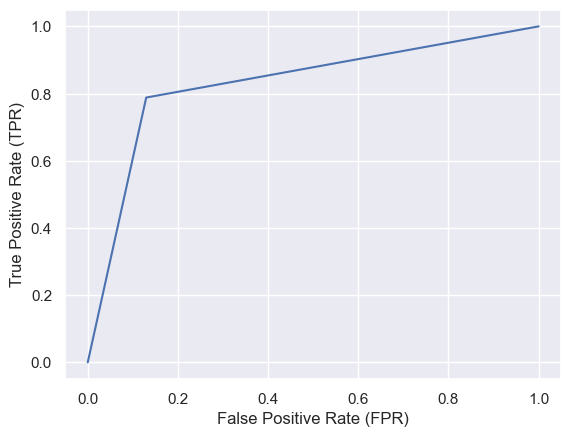

AUC score: 0.8292583972740555


In [21]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_pred_forest, y_test)

# Plot the ROC curve
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.show()

# Calculate the AUC score
auc_score = auc(fpr, tpr)
print("AUC score:", auc_score)

##### XGBClassifer

In [22]:
# Create an instance of XGBClassifier
# using learning rate to control the step size at which the model updates the weights, to optimize the model.
# fitting the model on train data
# predicting the model of test data
# evaluation metrics

xgbc = XGBClassifier(learning_rate=0.2)
xgbc.fit(x_train, y_train)
y_pred_xgbc = xgbc.predict(x_test)

print('Confusion Matrix:', '\n', confusion_matrix(y_pred_xgbc, y_test))
print('Classification Report:', '\n', classification_report(y_pred_xgbc, y_test))
print("Roc_Auc_Score: ", '\n', roc_auc_score(y_pred_xgbc, y_test))
print('F1 Score:', '\n', f1_score(y_pred_xgbc, y_test))

Confusion Matrix: 
 [[1540  201]
 [  67  192]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      1741
           1       0.49      0.74      0.59       259

    accuracy                           0.87      2000
   macro avg       0.72      0.81      0.75      2000
weighted avg       0.90      0.87      0.88      2000

Roc_Auc_Score:  
 0.8129309255099031
F1 Score: 
 0.5889570552147239


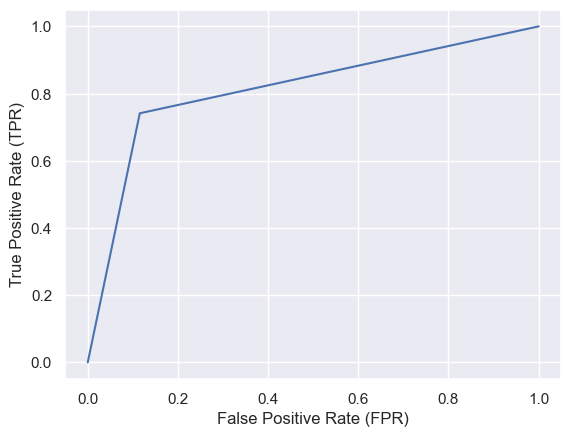

AUC score: 0.8129309255099031


In [23]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_pred_xgbc, y_test)

# Plot the ROC curve
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.show()

# Calculate the AUC score
auc_score = auc(fpr, tpr)
print("AUC score:", auc_score)

<Axes: >

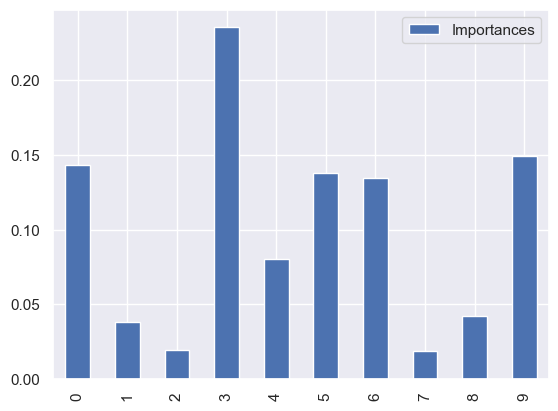

In [24]:
# plotting the feature importances

forest = RandomForestClassifier()
forest.fit(x_train, y_train)

importances = forest.feature_importances_
new_df = pd.DataFrame({"Features":pd.DataFrame(X).columns, "Importances":importances})
new_df.set_index('Features')
new_df.plot.bar()

In [25]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [26]:
# based on feature importances,
# 'Age' is very important, followed by 'EstimatedSalary' and 'CreditScore'
# while, 'Gender' is least important, followed by 'HasCrCard' and 'Geography'

##### Sequential

In [27]:
# Create an instance of Sequential()
# adding 'Dense' layers along with activation function

model=Sequential()
model.add(Dense(11,activation='relu',input_dim=10))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [28]:
# model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                121       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 265 (1.04 KB)
Trainable params: 265 (1.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# 'compile' is used to specify loss, optimizer and metrics that is used to train and evaluate the model
# 'optimizer' updates the model weights to minimize the loss function
# 'loss' measures how well the model's predictions match the actual targets
# 'metrics' are used to evaluate the performance on train and test data

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [30]:
# fitting the model on train data
# number of epochs depends on the complexity and size of the training data.

model.fit(x_train, y_train, epochs=25)

Epoch 1/25
250/250 [==============================] - 1s 2ms/step - loss: 0.4981 - accuracy: 0.7919
Epoch 2/25
250/250 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.7997
Epoch 3/25
250/250 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.8062
Epoch 4/25
250/250 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8110
Epoch 5/25
250/250 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8166
Epoch 6/25
250/250 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8248
Epoch 7/25
250/250 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8346
Epoch 8/25
250/250 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8435
Epoch 9/25
250/250 [==============================] - 0s 2ms/step - loss: 0.3665 - accuracy: 0.8480
Epoch 10/25
250/250 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8524

In [31]:
y_log=model.predict(x_test)
y_pred=np.where(y_log>0.5,1,0)

63/63 [==============================] - 0s 2ms/step


In [32]:
# Evaluation Metrics for Sequential model

print('Confusion Matrix:', '\n', confusion_matrix(y_pred, y_test))
print('Classification Report:', '\n', classification_report(y_pred, y_test))
print("Roc_Auc_Score: ", '\n', roc_auc_score(y_pred, y_test))
print('F1 Score:', '\n', f1_score(y_pred, y_test))

Confusion Matrix: 
 [[1525  200]
 [  82  193]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.88      0.92      1725
           1       0.49      0.70      0.58       275

    accuracy                           0.86      2000
   macro avg       0.72      0.79      0.75      2000
weighted avg       0.89      0.86      0.87      2000

Roc_Auc_Score:  
 0.7929380764163372
F1 Score: 
 0.5778443113772455


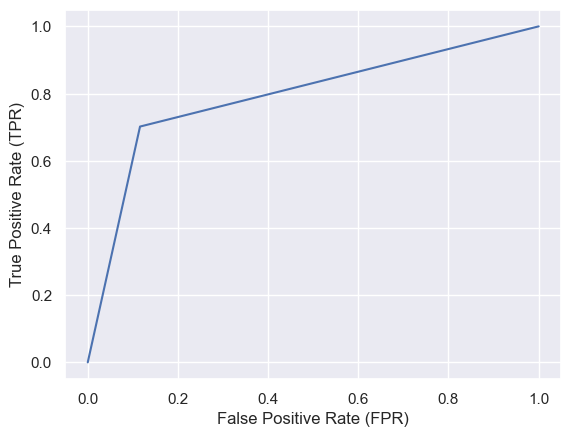

AUC score: 0.7929380764163372


In [33]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_pred, y_test)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.show()

# Calculate the AUC score
auc_score = auc(fpr, tpr)
print("AUC score:", auc_score)

In [34]:
# ROC AUC Score for the models

roc_auc_seq = roc_auc_score(y_pred, y_test)
roc_auc_forest = roc_auc_score(y_pred_forest, y_test)
roc_auc_xgbc = roc_auc_score(y_pred_xgbc, y_test)

Scores = {'RandomForest': roc_auc_forest, 'XGBClassifier': roc_auc_xgbc, 'Sequential': roc_auc_seq}
new_d = pd.DataFrame(data=Scores, index=[0,1,2])

dd = pd.DataFrame({"Model": ['RandomForest', 'XGBClassifier', 'Sequential'],
                  "AUC Score": [roc_auc_forest*100, roc_auc_xgbc*100, roc_auc_seq*100]
                  })
dd

,Model,AUC Score
0,RandomForest,82.925840
1,XGBClassifier,81.293093
2,Sequential,79.293808


In [35]:
# sample data for testing

df.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2487,710,2,0,32,3,0.00,1,1,0,94790.34,0
2254,679,2,1,36,6,147733.64,1,0,1,172501.38,0


In [36]:
# Predicting using our best model on sample data

new_sample = np.array([[619, 2, 0, 42, 2, 0.0, 1, 1, 1, 101348.88]])
new_sample2 = np.array([[649, 2, 0, 36, 8, 0.00, 2, 0, 1, 109179.89]])

new_pred = forest_model.predict(new_sample2)
print('Predicted Status:', (new_pred))

Predicted Status: [0]
